## Complete Project from start to end

In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

train.head()

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


In [5]:
#lets categorize events attributes based on events

events = train.query('event not in  ["end", "start"]')['event'].unique()
event_att_dict = {}

for key in events:
    query = str('event == "event_replace"').replace('event_replace', str(key))
    event_att_dict[key] = list(train.query(query)['event_attributes'].unique())

event_att_dict

{'challenge': ["['ball_action_forced']",
  "['opponent_dispossessed']",
  "['possession_retained']",
  "['fouled']",
  "['opponent_rounded']",
  "['challenge_during_ball_transfer']"],
 'throwin': ["['pass']", "['cross']"],
 'play': ["['pass', 'openplay']",
  "['cross', 'openplay']",
  "['pass', 'freekick']",
  "['cross', 'corner']",
  "['cross', 'freekick']",
  "['pass', 'corner']"]}

In [6]:
# check event count for each clip
event_count = train.query('event not in ["start", "end"]') \
    .groupby('video_id')['event'] \
    .value_counts().unstack()

event_count

event,challenge,play,throwin
video_id,,,
1606b0e6_0,56,319,21
1606b0e6_1,60,434,13
35bd9041_0,48,355,8
35bd9041_1,57,290,12
3c993bd2_0,53,347,14
3c993bd2_1,70,289,17
407c5a9e_1,56,283,11
4ffd5986_0,57,235,10
9a97dae4_1,48,237,6


In [7]:
# lets see the fps

sample_clip = cv2.VideoCapture("train/3c993bd2_0.mp4")
fps = sample_clip.get(cv2.CAP_PROP_FPS)
sample_clip.release()
fps

25.0

In [8]:
# need to create unique value for events

train['event_ID_unique'] = train.index // 3

train

,video_id,time,event,event_attributes,event_ID_unique
0,1606b0e6_0,200.265822,start,NaN,0
1,1606b0e6_0,201.150000,challenge,['ball_action_forced'],0
2,1606b0e6_0,202.765822,end,NaN,0
3,1606b0e6_0,210.124111,start,NaN,1
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed'],1
...,...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed'],3737
11214,ecf251d4_0,3058.072895,end,NaN,3738
11215,ecf251d4_0,3068.280519,start,NaN,3738
11216,ecf251d4_0,3069.547000,throwin,['pass'],3738


In [9]:
train.groupby(['event_ID_unique','event'])['time'].mean().unstack()

event,challenge,end,play,start,throwin
event_ID_unique,,,,,
0,201.150,202.765822,NaN,200.265822,NaN
1,210.870,212.624111,NaN,210.124111,NaN
2,NaN,220.350213,NaN,217.850213,219.230
3,NaN,226.430850,224.430,223.930850,NaN
4,NaN,231.455367,229.390,228.955367,NaN
...,...,...,...,...,...
3735,NaN,3043.126523,3041.347,3040.626523,NaN
3736,NaN,NaN,3051.707,3049.497881,NaN
3737,3056.587,3053.744023,NaN,3055.572895,NaN


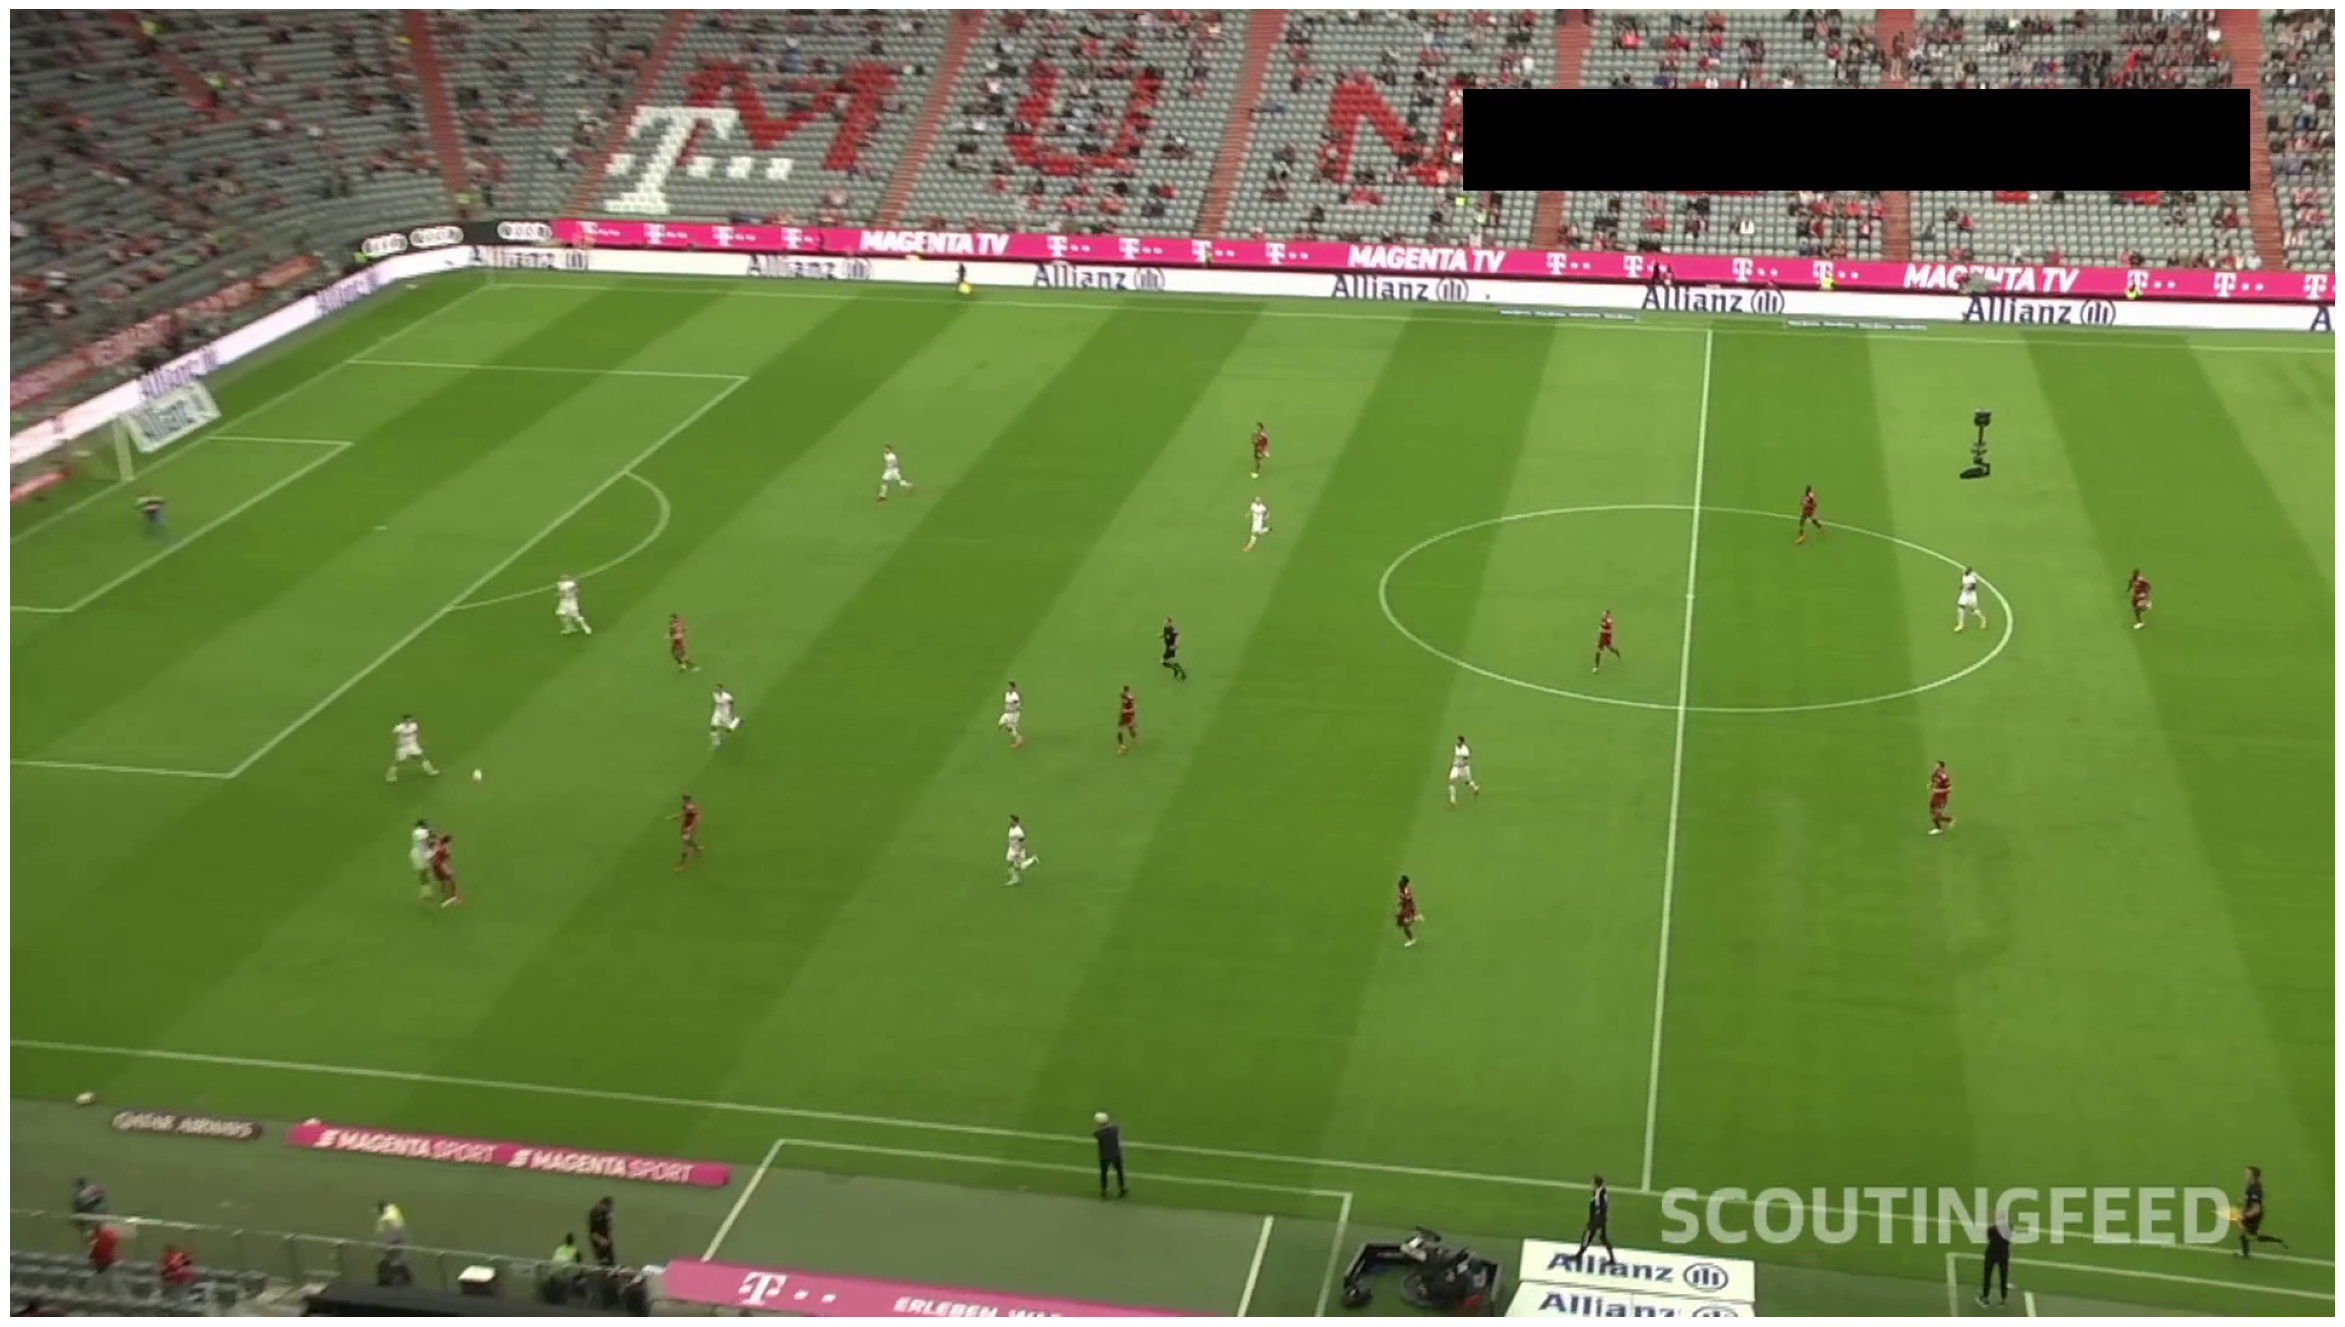

In [10]:

# let's check out a sample event

cap = cv2.VideoCapture('train/1606b0e6_0.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, fps*201)

ret, img = cap.read()

fig, ax = plt.subplots(figsize=(30,30))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')

cap.release()

In [11]:
train['frame'] = train['time']*fps
train

,video_id,time,event,event_attributes,event_ID_unique,frame
0,1606b0e6_0,200.265822,start,NaN,0,5006.645548
1,1606b0e6_0,201.150000,challenge,['ball_action_forced'],0,5028.750000
2,1606b0e6_0,202.765822,end,NaN,0,5069.145548
3,1606b0e6_0,210.124111,start,NaN,1,5253.102780
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed'],1,5271.750000
...,...,...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed'],3737,76414.675000
11214,ecf251d4_0,3058.072895,end,NaN,3738,76451.822375
11215,ecf251d4_0,3068.280519,start,NaN,3738,76707.012977
11216,ecf251d4_0,3069.547000,throwin,['pass'],3738,76738.675000
